In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Importing the dataset


In [11]:
df = pd.read_csv('vegetable_market.csv')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


# Performing Data Cleaning

In [13]:
#checking to see the number of rows  and columns in the dataset
df.shape

(121, 7)

In [15]:
# checking the data types and not null values per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Vegetable                        121 non-null    object
 1   Season                           121 non-null    object
 2   Month                            121 non-null    object
 3   Temp                             121 non-null    int64 
 4   Deasaster Happen in last 3month  121 non-null    object
 5   Vegetable condition              121 non-null    object
 6   Price per kg                     121 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 6.7+ KB


In [17]:
# Displaying the first ten rows
df.head (10)


,Vegetable,Season,Month,Temp,Deasaster Happen in last 3month,Vegetable condition,Price per kg
0,potato,winter,jan,15,no,fresh,20
1,tomato,winter,jan,15,no,fresh,50
2,peas,winter,jan,15,no,fresh,70
3,pumkin,winter,jan,15,no,fresh,25
4,cucumber,winter,jan,15,no,fresh,20
5,pointed grourd,winter,jan,15,yes,fresh,130
6,Raddish,winter,jan,15,no,fresh,10
7,Bitter gourd,winter,jan,15,no,fresh,35
8,onion,winter,jan,15,no,fresh,35
9,tomato,winter,jan,15,no,fresh,45


In [19]:
# renaming the column Deasaster Happen in last 3month to Disaster_Happen_in_last3_month
df.rename(columns={"Deasaster Happen in last 3month":"Disaster_Happen_in_last3_month"},inplace=True)

In [21]:
#checking to see the total number of  duplicates
df.duplicated().sum()

10

In [23]:
# dropping duplicates
df.drop_duplicates (inplace= True)

In [25]:
# checking to see if the changes have reflected
df.duplicated().sum()

0

In [27]:
# Reset index and drop the old index
df.reset_index(drop=True, inplace=True)

In [29]:
#checking the different vegetables in the dataset
df['Vegetable'].unique()

array(['potato', 'tomato ', 'peas', 'pumkin', 'cucumber',
       'pointed grourd ', 'Raddish', 'Bitter gourd', 'onion', 'garlic',
       'cabage', 'califlower', 'chilly', 'okra', 'brinjal', 'ginger',
       'radish'], dtype=object)

In [31]:
# replacing the white space in tomato and other vegetables which have been spelt wrongly
df.loc[df['Vegetable']=='tomato ', 'Vegetable'] ='tomato'
df.loc[df['Vegetable']== 'pumkin', 'Vegetable'] = 'pumpkin'
df.loc[df['Vegetable']== 'Raddish', 'Vegetable'] = 'radish'
df.loc[df['Vegetable']=='califlower', 'Vegetable'] ='cauliflower'
df.loc[df['Vegetable']=='cabage', 'Vegetable'] ='cabbage'

# capitalising each vegetable and removing whitespace
df['Vegetable'] = df['Vegetable'].str.strip().str.title()


In [33]:
#finding the number of each vegetable
count_of_vegetables = df['Vegetable'].value_counts()

In [35]:
count_of_vegetables

Vegetable
Tomato            11
Potato            10
Peas              10
Pumpkin            9
Radish             9
Ginger             9
Cabbage            7
Pointed Grourd     6
Cauliflower        6
Brinjal            6
Bitter Gourd       5
Onion              5
Garlic             5
Okra               5
Cucumber           4
Chilly             4
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Vegetables')

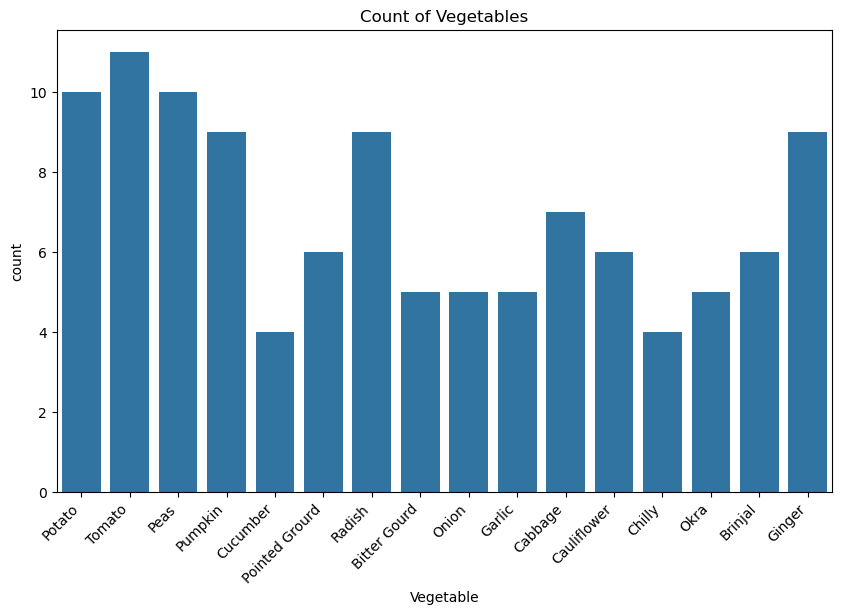

In [37]:
#visualising the data 
plt.figure(figsize=(10,6))

sns.countplot(data=df,x='Vegetable')
plt.xticks(rotation=45, ha = 'right')
plt.title('Count of Vegetables')

Text(0.5, 1.0, 'Vegetetable count by vegetable condition')

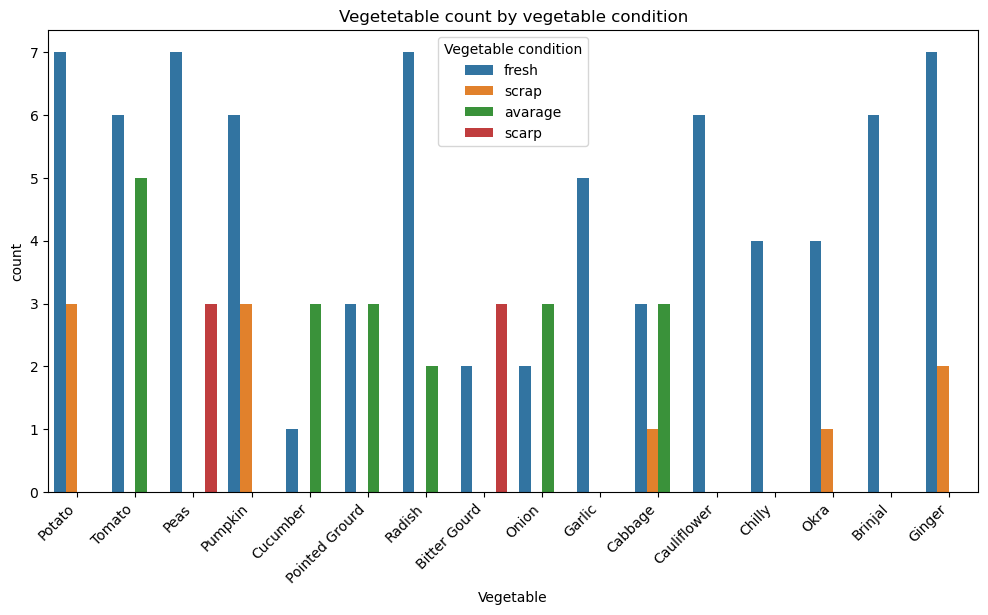

In [39]:
#visualising the data with a hue 
plt.figure(figsize=(12,6))

sns.countplot(data=df,x='Vegetable',hue='Vegetable condition')
plt.xticks(rotation=45, ha = 'right')
plt.title('Vegetetable count by vegetable condition')

In [41]:
#checking for the unique seasons
df['Season'].unique()

array(['winter', 'summer', 'monsoon', 'autumn', 'spring'], dtype=object)

In [43]:
#checking the count of each season
df['Season'].value_counts()

Season
winter     55
summer     32
monsoon    20
autumn      2
spring      2
Name: count, dtype: int64

/var/folders/zz/mtjch0cs3f5fyjxlm9h1bbd00000gn/T/ipykernel_2104/547603495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data =df, x='Season',palette='Set2')


Text(0.5, 1.0, 'Vegetable Count in Different Seasons')

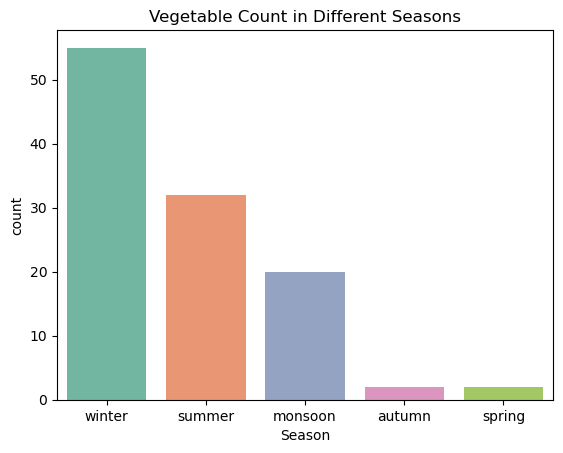

In [205]:
#Plotting this on a countplot
sns.countplot(data =df, x='Season',palette='Set2')
plt.title('Vegetable Count in Different Seasons')

In [207]:
#checking the unique months in the dataset
df['Month'].unique()

array(['jan', 'apr', 'july', 'sept', 'oct', 'dec', 'may', 'aug', 'june',
       'march'], dtype=object)

In [47]:
#i realised an error was made when entering a month, so i will be finding the month
#the best way is to determine the season for that month and check the months for that season
# find the season for month ''
df.loc[df['Month'] == ' ']

,Vegetable,Season,Month,Temp,Disaster_Happen_in_last3_month,Vegetable condition,Price per kg
43,Pumpkin,monsoon,,27,no,scrap,15
67,Pumpkin,monsoon,,27,no,scrap,20
94,Pumpkin,monsoon,,27,no,scrap,23


In [49]:
#finding month for moonsoon season

df.loc[df['Season']=='monsoon']

,Vegetable,Season,Month,Temp,Disaster_Happen_in_last3_month,Vegetable condition,Price per kg
24,Pointed Grourd,monsoon,july,30,no,fresh,25
28,Tomato,monsoon,july,28,yes,fresh,130
30,Cabbage,monsoon,july,27,yes,scrap,40
33,Okra,monsoon,aug,29,no,fresh,15
37,Potato,monsoon,aug,31,yes,fresh,40
38,Peas,monsoon,july,30,yes,fresh,250
43,Pumpkin,monsoon,,27,no,scrap,15
44,Cucumber,monsoon,july,31,no,avarage,12
53,Okra,monsoon,aug,29,yes,fresh,40
61,Potato,monsoon,aug,31,yes,fresh,50


In [209]:
#finding the counts of the vegetables for the months in each season
df.groupby('Season')['Month'].value_counts()

Season   Month
autumn   oct       1
         sept      1
monsoon  aug      10
         july     10
spring   march     2
summer   apr      19
         may       8
         jan       3
         june      2
winter   jan      48
         dec       7
Name: count, dtype: int64

In [195]:
#finding the 
df['Month'].value_counts()

Month
jan      51
apr      19
july     10
may       8
dec       7
aug       7
          3
june      2
march     2
sept      1
oct       1
Name: count, dtype: int64

In [53]:
#filtering rows with ' ' as their month
df[df['Month']==' ']

,Vegetable,Season,Month,Temp,Disaster_Happen_in_last3_month,Vegetable condition,Price per kg
43,Pumpkin,monsoon,,27,no,scrap,15
67,Pumpkin,monsoon,,27,no,scrap,20
94,Pumpkin,monsoon,,27,no,scrap,23


In [55]:
df[df.Season =="monsoon"]['Month'].value_counts()

Month
july    10
aug      7
         3
Name: count, dtype: int64

In [654]:
#finding all rows of the vegetable pumpkin
df.loc[df['Vegetable'] == 'Pumpkin' , :]

,Vegetable,Season,Month,Temp,Disaster_Happen_in_last3_month,Vegetable condition,Price per kg,month_num
3,Pumpkin,winter,jan,15,no,fresh,25,1
15,Pumpkin,winter,jan,15,no,fresh,20,1
34,Pumpkin,summer,may,41,no,fresh,10,4
43,Pumpkin,monsoon,aug,27,no,scrap,15,7
58,Pumpkin,summer,may,41,no,fresh,15,4
67,Pumpkin,monsoon,aug,27,no,scrap,20,7
79,Pumpkin,winter,jan,15,no,fresh,19,1
94,Pumpkin,monsoon,aug,27,no,scrap,23,7
105,Pumpkin,winter,jan,15,no,fresh,21,1


In [213]:
#replacing the month column at the various indices with aug
#note that the indices below have their month section as ' '
df.loc[[43,67,94],'Month']='aug'

/var/folders/zz/mtjch0cs3f5fyjxlm9h1bbd00000gn/T/ipykernel_2104/1027269730.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month',data=df_sorted, order=df_sorted['Month'].unique(),palette='Set2')  # Ensure the order is correct


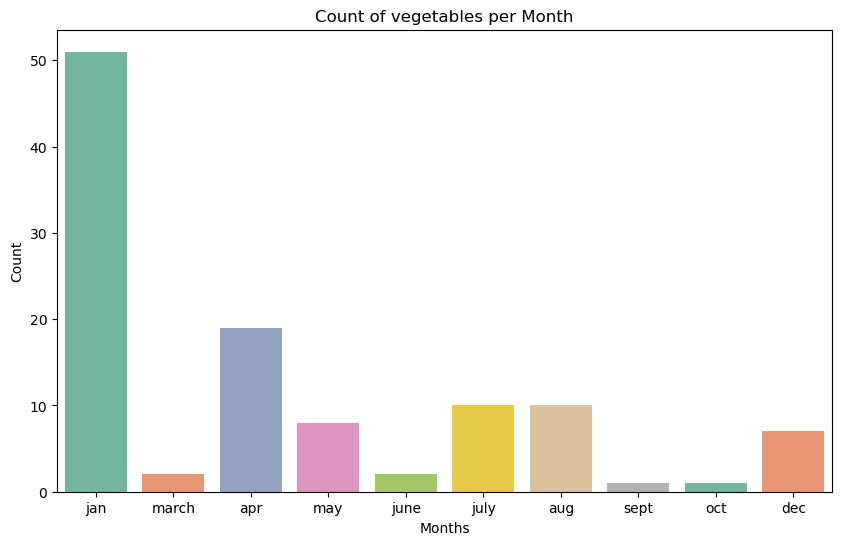

In [59]:
#now that i have made the necesarry corrections to the month , let me work on visualising the count of month in a season
# Create a dictionary to map months to numerical values
month_mapping = {
    'jan': 1, 'march': 2, 'apr': 3, 'may': 4, 'june': 5,
    'july': 6, 'aug': 7, 'sept': 8, 'oct': 9, 'dec': 10
}
# Create a new column 'month_num' by mapping the 'Month' column
df['month_num'] = df['Month'].map(month_mapping)

# Sort the DataFrame based on the 'month_num' column
df_sorted = df.sort_values('month_num')
# Create the countplot
plt.figure(figsize=(10,6))
sns.countplot(x='Month',data=df_sorted, order=df_sorted['Month'].unique(),palette='Set2')  # Ensure the order is correct

# Set labels and title
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Count of vegetables per Month')

plt.show()


In [61]:
df['Month'].unique()

array(['jan', 'apr', 'july', 'sept', 'oct', 'dec', 'may', 'aug', 'june',
       'march'], dtype=object)

In [63]:
#find the maximum temperature
df.Temp.max()

43

In [65]:
#finding the minimum temperature
df.Temp.min()

15

In [67]:
#get the statistoics for the temperature column
df.Temp.describe()

count    111.000000
mean      24.693694
std        9.394189
min       15.000000
25%       15.000000
50%       27.000000
75%       32.000000
max       43.000000
Name: Temp, dtype: float64

In [69]:
#counting the unique values
df.Temp.value_counts()

Temp
15    48
32     9
30     8
31     6
35     6
37     6
29     4
27     4
38     3
33     3
43     3
21     3
26     3
41     2
28     1
18     1
40     1
Name: count, dtype: int64

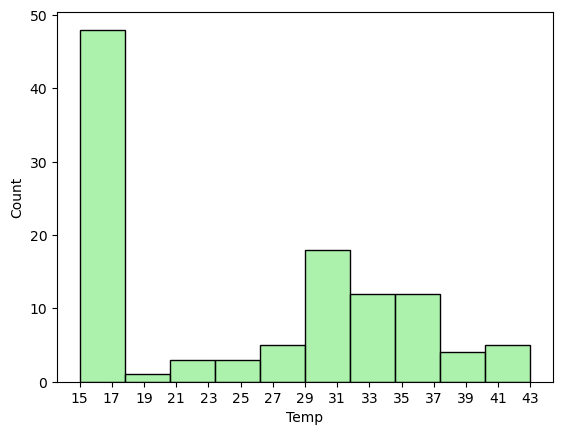

In [71]:
#visualising the temperature on  a histogram
sns.histplot(data=df , x="Temp" , color="lightgreen",bins=10)
plt.xticks(ticks=np.arange(df["Temp"].min() , df["Temp"].max()+2 ,step=2) )
plt.show()

In [73]:
#checking the vegetable condition
df["Vegetable condition"].value_counts()


Vegetable condition
fresh      76
avarage    19
scrap      10
scarp       6
Name: count, dtype: int64

In [75]:
#locating the rows for every scarp vegetable condition
df.loc[df["Vegetable condition"]=="scarp",:]

,Vegetable,Season,Month,Temp,Disaster_Happen_in_last3_month,Vegetable condition,Price per kg,month_num
42,Peas,winter,jan,15,no,scarp,40,1
47,Bitter Gourd,winter,dec,21,no,scarp,25,10
66,Peas,winter,jan,15,no,scarp,42,1
71,Bitter Gourd,winter,dec,21,no,scarp,29,10
93,Peas,winter,jan,15,no,scarp,35,1
98,Bitter Gourd,winter,dec,21,no,scarp,32,10


In [77]:
#Correcting spelling mistakes for scrap and average vegetable condition
df['Vegetable condition'] = df['Vegetable condition'].replace('scarp', 'scrap')
df['Vegetable condition'] = df['Vegetable condition'].replace('avarage', 'average')

In [219]:
#insight , all Bittergourd vegetables were scrap in the month of december, the best condition for bittergourd in winter is to keep it at 15 degrees
# Filter the DataFrame for 'scrap' vegetable condition
data = df[df['Vegetable condition'] == 'scrap']

# Group by 'Month'
grouped_data = data.groupby('Month')

# Retrieve data for the month of December
grouped_data.get_group('dec')


,Vegetable,Season,Month,Temp,Disaster_Happen_in_last3_month,Vegetable condition,Price per kg,month_num
40,Potato,winter,dec,15,no,scrap,16,10
47,Bitter Gourd,winter,dec,21,no,scrap,25,10
64,Potato,winter,dec,15,no,scrap,10,10
71,Bitter Gourd,winter,dec,21,no,scrap,29,10
92,Potato,winter,dec,15,no,scrap,24,10
98,Bitter Gourd,winter,dec,21,no,scrap,32,10


In [83]:
# Retrieve data for the month of December
grouped_data.get_group('jan')

,Vegetable,Season,Month,Temp,Disaster_Happen_in_last3_month,Vegetable condition,Price per kg,month_num
14,Okra,winter,jan,15,no,scrap,30,1
42,Peas,winter,jan,15,no,scrap,40,1
66,Peas,winter,jan,15,no,scrap,42,1
93,Peas,winter,jan,15,no,scrap,35,1


In [685]:
df[df['Vegetable']=='Peas']

,Vegetable,Season,Month,Temp,Disaster_Happen_in_last3_month,Vegetable condition,Price per kg,month_num
2,Peas,winter,jan,15,no,fresh,70,1
19,Peas,summer,apr,33,no,fresh,100,3
38,Peas,monsoon,july,30,yes,fresh,250,6
42,Peas,winter,jan,15,no,scrap,40,1
62,Peas,monsoon,july,30,yes,fresh,210,6
66,Peas,winter,jan,15,no,scrap,42,1
83,Peas,summer,apr,33,no,fresh,35,3
90,Peas,monsoon,july,30,yes,fresh,170,6
93,Peas,winter,jan,15,no,scrap,35,1
109,Peas,summer,apr,33,no,fresh,33,3


In [85]:
df[df['Vegetable']=='Onion']

,Vegetable,Season,Month,Temp,Disaster_Happen_in_last3_month,Vegetable condition,Price per kg,month_num
8,Onion,winter,jan,15,no,fresh,35,1
27,Onion,summer,apr,38,no,fresh,20,3
48,Onion,winter,jan,26,no,average,28,1
72,Onion,winter,jan,26,no,average,32,1
99,Onion,winter,jan,26,no,average,24,1


<Axes: ylabel='count'>

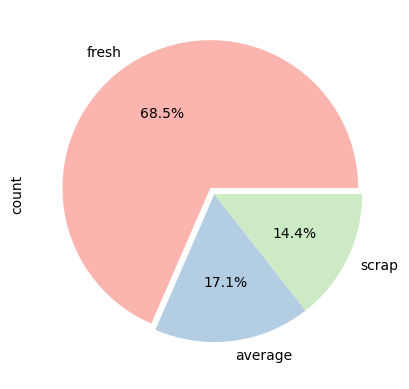

In [87]:
colors = plt.get_cmap('Pastel1').colors
df["Vegetable condition"].value_counts().plot(kind ="pie" , autopct='%1.1f%%', colors=colors, explode=(0.05 , 0,0))

In [89]:
#finding the top 5 most expensive vegetables
vegetable_total_price =df.groupby('Vegetable')['Price per kg'].sum()

In [91]:
vegetable_total_price

Vegetable
Bitter Gourd       191
Brinjal            290
Cabbage            358
Cauliflower        194
Chilly             445
Cucumber            68
Garlic             695
Ginger            1028
Okra               145
Onion              139
Peas               985
Pointed Grourd     343
Potato             276
Pumpkin            168
Radish             282
Tomato             647
Name: Price per kg, dtype: int64

In [93]:
vegetable_total_price.sort_values(ascending=False)

Vegetable
Ginger            1028
Peas               985
Garlic             695
Tomato             647
Chilly             445
Cabbage            358
Pointed Grourd     343
Brinjal            290
Radish             282
Potato             276
Cauliflower        194
Bitter Gourd       191
Pumpkin            168
Okra               145
Onion              139
Cucumber            68
Name: Price per kg, dtype: int64

In [95]:
top_5_expensive_vegetables = vegetable_total_price.sort_values(ascending=False).head(5)

top_5_expensive_vegetables_df = top_5_expensive_vegetables.reset_index()
top_5_expensive_vegetables_df.head(2)
#print(type(top_5_expensive_vegetables_df))

,Vegetable,Price per kg
0,Ginger,1028
1,Peas,985


Text(0.5, 1.0, 'Top 5 most expensive vegetables on the market')

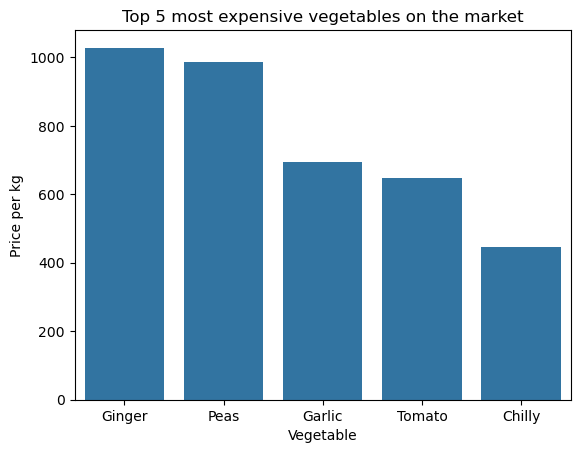

In [97]:
#visualising the top5  most expensive vegetable
sns.barplot(data = top_5_expensive_vegetables_df,x = 'Vegetable',y='Price per kg')
plt.title('Top 5 most expensive vegetables on the market')

In [99]:
top_5_cheap_vegetables = vegetable_total_price.sort_values(ascending=True).head(5)

In [101]:
top_5_cheap_vegetables_df= top_5_cheap_vegetables.reset_index()

Text(0.5, 1.0, 'Top 5 Least Expensive Vegetables On The Market')

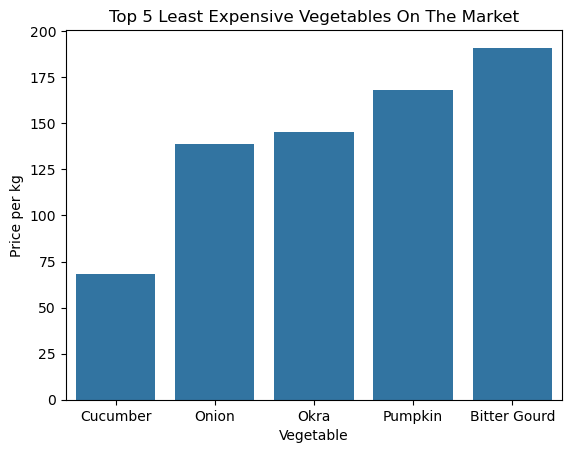

In [103]:
sns.barplot(data = top_5_cheap_vegetables_df, x='Vegetable',y='Price per kg')
plt.title('Top 5 Least Expensive Vegetables On The Market')

In [105]:
#price of vegetable per month
vegetable_monthly_price =df.groupby(['Vegetable','Month'])['Price per kg'].sum()
vegetable_monthly_price_df = vegetable_monthly_price.reset_index()

In [107]:
vegetable_monthly_price_df

,Vegetable,Month,Price per kg
0,Bitter Gourd,dec,86
1,Bitter Gourd,jan,35
2,Bitter Gourd,sept,70
3,Brinjal,jan,205
4,Brinjal,may,85
5,Cabbage,apr,83
6,Cabbage,jan,235
7,Cabbage,july,40
8,Cauliflower,apr,115
9,Cauliflower,dec,20


In [109]:
# Group the DataFrame by 'Vegetable' and 'Month'
vegetable_monthly_price_df = df.groupby(['Vegetable', 'Month'], as_index=False)['Price per kg'].sum()

# Initialize lists to store the results
highest_month = []
cheapest_month = []

# Group the DataFrame by 'Vegetable'
grouped_vegetables = vegetable_monthly_price_df.groupby('Vegetable')

# Iterate over each vegetable group
for vegetable, group in grouped_vegetables:
    # Find the row with the maximum price (highest month)
    highest_month_for_vegetable = group.loc[group['Price per kg'].idxmax()]
    
    # Find the row with the minimum price (cheapest month)
    cheapest_month_for_vegetable = group.loc[group['Price per kg'].idxmin()]
    
    # Append the results to the lists
    highest_month.append({
        'Vegetable': vegetable,
        'Month': highest_month_for_vegetable['Month'],  # Ensure the 'Month' is accessed correctly
        'Price per kg': highest_month_for_vegetable['Price per kg']
    })
    
    cheapest_month.append({
        'Vegetable': vegetable,
        'Month': cheapest_month_for_vegetable['Month'],  # Ensure the 'Month' is accessed correctly
        'Price per kg': cheapest_month_for_vegetable['Price per kg']
    })

# Convert the results into DataFrames for better readability
highest_month_df = pd.DataFrame(highest_month)
cheapest_month_df = pd.DataFrame(cheapest_month)

# Display the results
print("Highest price month for each vegetable:")
print(highest_month_df)

print("\nCheapest price month for each vegetable:")
print(cheapest_month_df)


Highest price month for each vegetable:
         Vegetable Month  Price per kg
0     Bitter Gourd   dec            86
1          Brinjal   jan           205
2          Cabbage   jan           235
3      Cauliflower   apr           115
4           Chilly   jan           245
5         Cucumber  july            48
6           Garlic   jan           525
7           Ginger   jan           638
8             Okra   aug           115
9            Onion   jan           119
10            Peas  july           630
11  Pointed Grourd   may           158
12          Potato   aug           135
13         Pumpkin   jan            85
14          Radish   apr           210
15          Tomato   apr           290

Cheapest price month for each vegetable:
         Vegetable Month  Price per kg
0     Bitter Gourd   jan            35
1          Brinjal   may            85
2          Cabbage  july            40
3      Cauliflower   dec            20
4           Chilly   may           200
5         Cucumber   

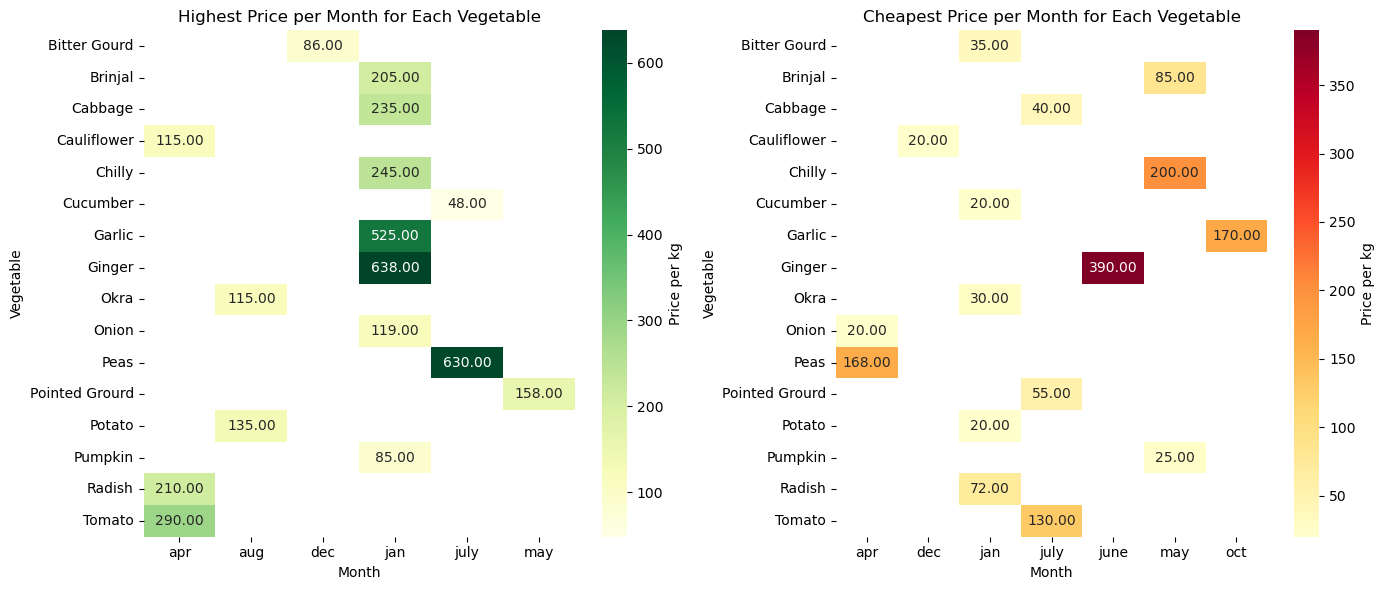

In [111]:

# Create DataFrame for highest and cheapest prices
highest_month_df = pd.DataFrame(highest_month)
cheapest_month_df = pd.DataFrame(cheapest_month)

# Pivot the DataFrames to have 'Vegetable' as rows, 'Month' as columns, and 'Price per kg' as values
highest_pivot = highest_month_df.pivot(index='Vegetable', columns='Month', values='Price per kg')
cheapest_pivot = cheapest_month_df.pivot(index='Vegetable', columns='Month', values='Price per kg')

# Set up the figure and axes for heatmaps
plt.figure(figsize=(14, 6))

# Plot heatmap for highest prices
plt.subplot(1, 2, 1)
sns.heatmap(highest_pivot, annot=True, fmt=".2f", cmap='YlGn', cbar_kws={'label': 'Price per kg'})
plt.title('Highest Price per Month for Each Vegetable')

# Plot heatmap for cheapest prices
plt.subplot(1, 2, 2)
sns.heatmap(cheapest_pivot, annot=True, fmt=".2f", cmap='YlOrRd', cbar_kws={'label': 'Price per kg'})
plt.title('Cheapest Price per Month for Each Vegetable')

# Show the plot
plt.tight_layout()
plt.show()


In [113]:
#findig price Distribution per Season
season_prices = df.groupby('Season')['Price per kg'].sum()

In [115]:
season_prices_df =season_prices.reset_index()

In [117]:
season_prices_df


,Season,Price per kg
0,autumn,240
1,monsoon,1211
2,spring,39
3,summer,2005
4,winter,2759


Text(0.5, 1.0, 'Seasons with their respective prices')

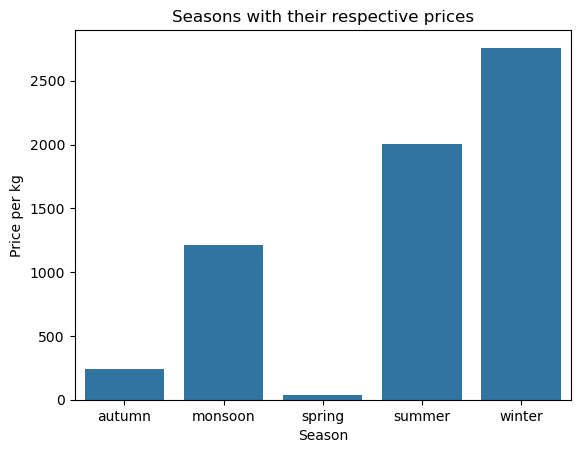

In [119]:
sns.barplot(data=season_prices_df,x='Season',y='Price per kg')
plt.title ('Seasons with their respective prices')

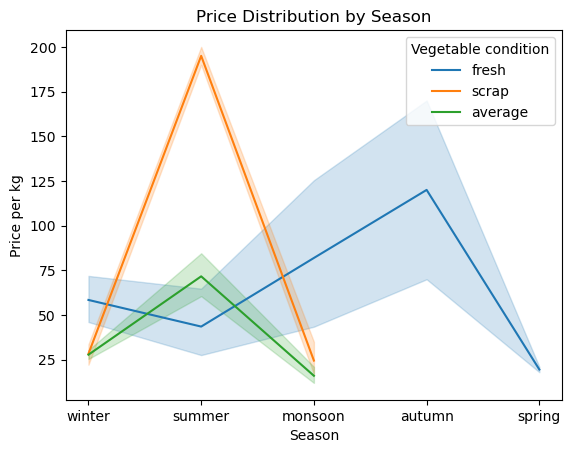

In [121]:
sns.lineplot(data=df, x='Season', y='Price per kg',hue="Vegetable condition")
plt.title('Price Distribution by Season')
plt.show()

Text(0.5, 1.0, 'How Temperature affects prices of vegetables based on vegetable condition')

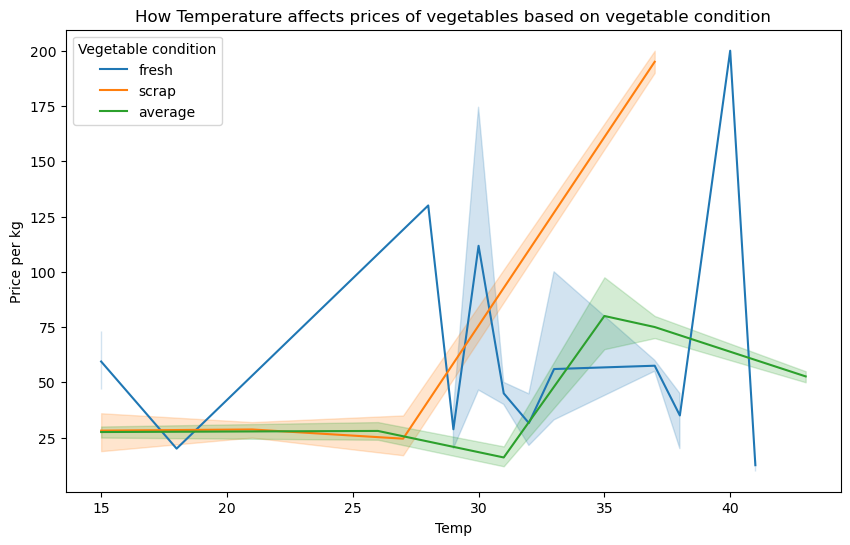

In [123]:
#checking to see if temperature and price are correalted
plt.figure(figsize=(10,6))
sns.lineplot(data = df , x ='Temp',y='Price per kg',hue ='Vegetable condition')
plt.title('How Temperature affects prices of vegetables based on vegetable condition')

In [125]:
#inisghts for the above diagram, 
#1. price of Scrap vegetables increases as temperature increases 
#2.price of vegetable decreases at a temp of 40 and above for fresh vegetables

/var/folders/zz/mtjch0cs3f5fyjxlm9h1bbd00000gn/T/ipykernel_2104/2377721499.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data =df,x='Season',y='Price per kg',palette='cool')


Text(0.5, 1.0, 'Price Distribution  by Season')

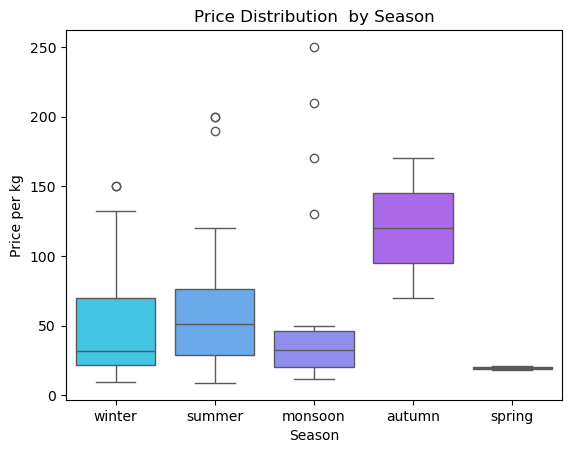

In [127]:
sns.boxplot(data =df,x='Season',y='Price per kg',palette='cool')
plt.title('Price Distribution  by Season')

In [129]:
 # Group the data by 'Vegetable' and 'Vegetable condition', then sum the 'Price per kg'
vegetable_groups = df.groupby(['Vegetable', 'Vegetable condition'])['Price per kg'].sum().reset_index()

# Create an empty dictionary to store the results
vegetable_condition_totals = {}

# Loop through each vegetable
for vegetable in df['Vegetable'].unique():
    # Filter the data for the current vegetable
    vegetable_data = vegetable_groups[vegetable_groups['Vegetable'] == vegetable]
    
    # Store the sum of prices for each condition in the dictionary
    vegetable_condition_totals[vegetable] = {
        condition: vegetable_data[vegetable_data['Vegetable condition'] == condition]['Price per kg'].sum()
        for condition in ['fresh', 'scrap', 'average']  # Conditions to loop through
    }

# Display the result
for vegetable, prices in vegetable_condition_totals.items():
    print(f"{vegetable}:")
    for condition, price in prices.items():
        print(f"  {condition}: {price}")


Potato:
  fresh: 226
  scrap: 50
  average: 0
Tomato:
  fresh: 302
  scrap: 0
  average: 345
Peas:
  fresh: 868
  scrap: 117
  average: 0
Pumpkin:
  fresh: 110
  scrap: 58
  average: 0
Cucumber:
  fresh: 20
  scrap: 0
  average: 48
Pointed Grourd:
  fresh: 185
  scrap: 0
  average: 158
Radish:
  fresh: 132
  scrap: 0
  average: 150
Bitter Gourd:
  fresh: 105
  scrap: 86
  average: 0
Onion:
  fresh: 55
  scrap: 0
  average: 84
Garlic:
  fresh: 695
  scrap: 0
  average: 0
Cabbage:
  fresh: 128
  scrap: 40
  average: 190
Cauliflower:
  fresh: 194
  scrap: 0
  average: 0
Chilly:
  fresh: 445
  scrap: 0
  average: 0
Okra:
  fresh: 115
  scrap: 30
  average: 0
Brinjal:
  fresh: 290
  scrap: 0
  average: 0
Ginger:
  fresh: 638
  scrap: 390
  average: 0


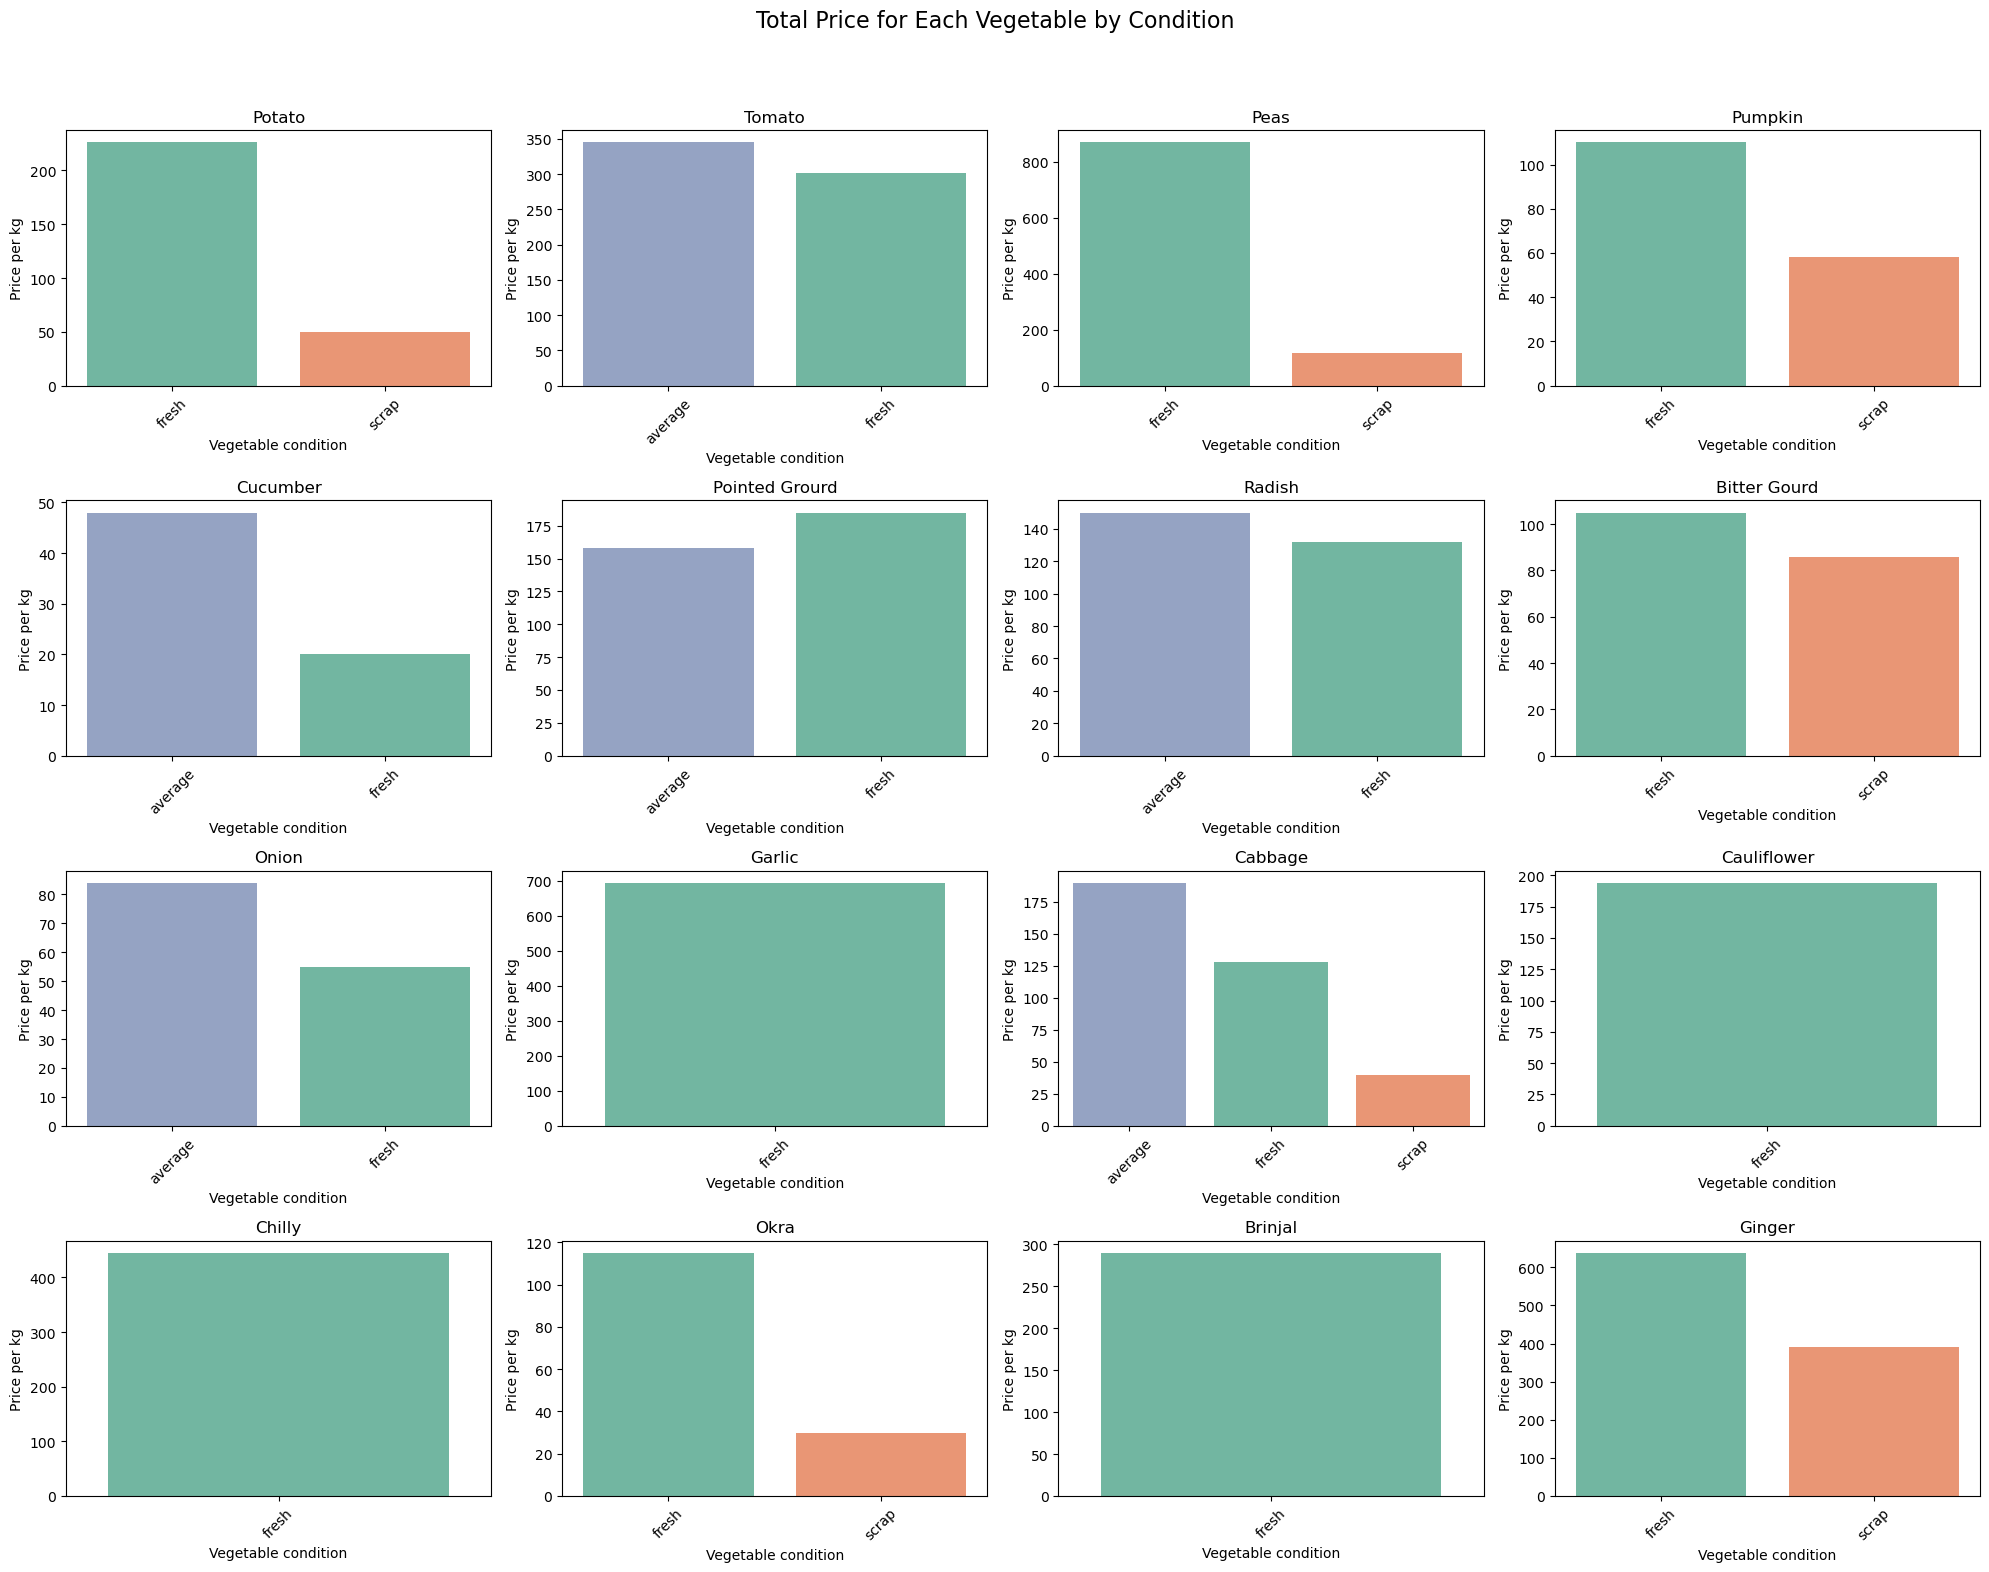

In [131]:

# Group the data by 'Vegetable' and 'Vegetable condition', then sum the 'Price per kg'
vegetable_groups = df.groupby(['Vegetable', 'Vegetable condition'])['Price per kg'].sum().reset_index()

# Define a fixed color palette for the conditions
condition_palette = {'fresh': '#66c2a5', 'scrap': '#fc8d62', 'average': '#8da0cb'}

# Get the list of unique vegetables
vegetables = df['Vegetable'].unique()

# Set up the number of rows and columns for the subplots (4 rows, 4 columns for 16 vegetables)
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
fig.suptitle('Total Price for Each Vegetable by Condition', fontsize=16)

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through each vegetable and plot the corresponding data
for i, vegetable in enumerate(vegetables):
    # Filter data for the current vegetable
    veg_data = vegetable_groups[vegetable_groups['Vegetable'] == vegetable]
    
    # Plot the data using a barplot for each vegetable, with fixed colors for each condition
    sns.barplot(data=veg_data, x='Vegetable condition', y='Price per kg', hue='Vegetable condition', 
                ax=axes[i], palette=condition_palette, dodge=False)
    
    # Set the title for each subplot
    axes[i].set_title(vegetable, fontsize=12)
    
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)
    
    # Remove the legend if it exists
    legend = axes[i].get_legend()
    if legend is not None:
        legend.remove()

# Adjust layout to avoid overlapping of plots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


/var/folders/zz/mtjch0cs3f5fyjxlm9h1bbd00000gn/T/ipykernel_2104/2145157828.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Vegetable condition', y='Temp', marker='o',
/var/folders/zz/mtjch0cs3f5fyjxlm9h1bbd00000gn/T/ipykernel_2104/2145157828.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x='Vegetable condition', y='Temp', marker='o',


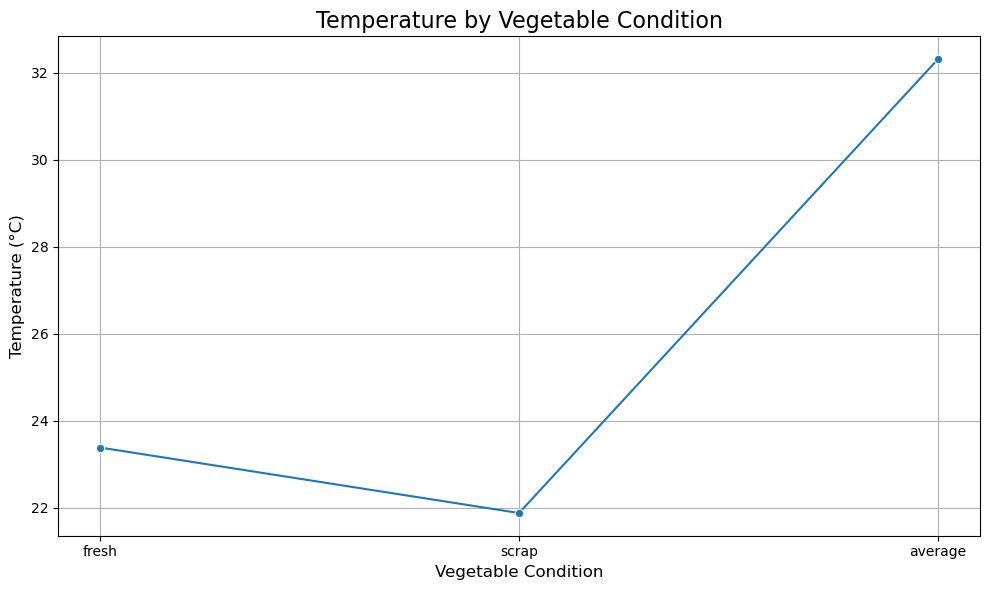

In [133]:

# Define a fixed color palette for the conditions
condition_palette = {'fresh': '#66c2a5', 'scrap': '#fc8d62', 'average': '#8da0cb'}

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Vegetable condition', y='Temp', marker='o', 
             palette=condition_palette, ci=None)

# Customizing  the  lineplot
plt.title('Temperature by Vegetable Condition', fontsize=16)
plt.xlabel('Vegetable Condition', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid(True)  # Add gridlines for readability

# Show the plot
plt.tight_layout()
plt.show()


In [135]:
df[df['Vegetable condition']== 'average']

,Vegetable,Season,Month,Temp,Disaster_Happen_in_last3_month,Vegetable condition,Price per kg,month_num
21,Tomato,summer,apr,35,no,average,80,3
25,Radish,summer,apr,37,yes,average,70,3
41,Tomato,winter,jan,15,no,average,30,1
44,Cucumber,monsoon,july,31,no,average,12,6
45,Pointed Grourd,summer,may,43,no,average,50,4
48,Onion,winter,jan,26,no,average,28,1
51,Cabbage,summer,jan,35,yes,average,75,1
56,Tomato,summer,apr,35,yes,average,120,3
57,Radish,summer,apr,37,yes,average,80,3
65,Tomato,winter,jan,15,no,average,25,1


In [137]:
#finding the vegetable condition per season
season_condition =df.groupby('Season')['Vegetable condition'].value_counts()

In [139]:
season_condition

Season   Vegetable condition
autumn   fresh                   2
monsoon  fresh                  13
         scrap                   4
         average                 3
spring   fresh                   2
summer   fresh                  19
         average                11
         scrap                   2
winter   fresh                  40
         scrap                  10
         average                 5
Name: count, dtype: int64

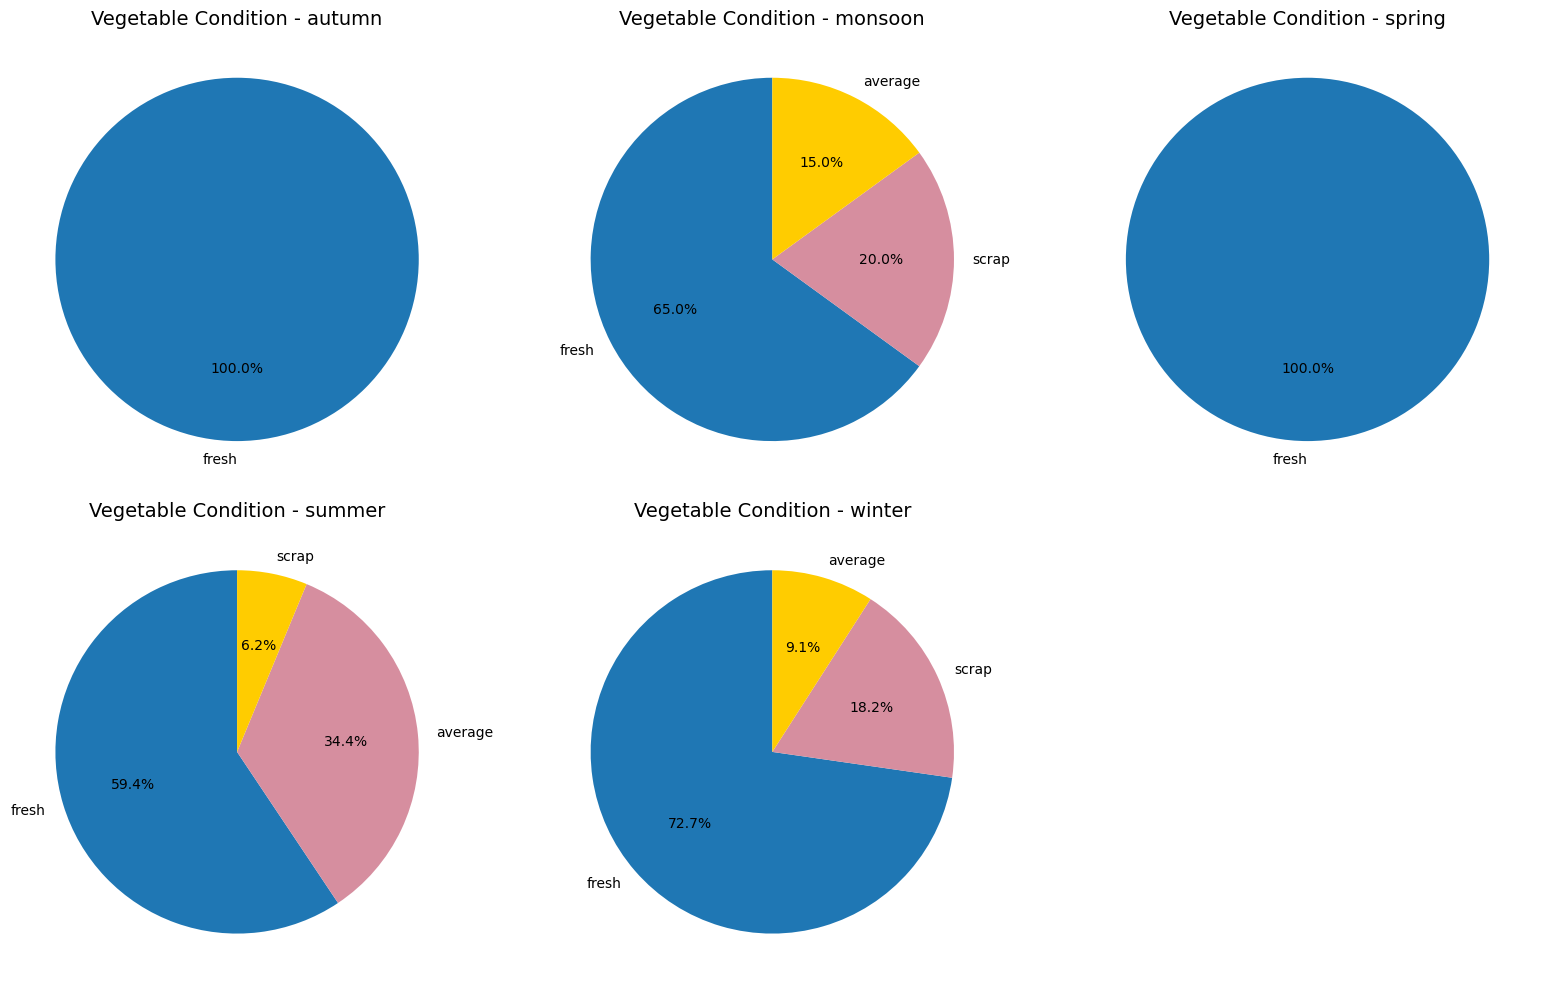

In [141]:

# Convert the Series to a DataFrame
season_condition_df = season_condition.reset_index(name='Count')

# Get unique seasons
seasons = season_condition_df['Season'].unique()

# Define a custom color palette 
custom_colors = ['#1f77b4', '#d68e9f', '#ffcc00', '#ff7f0e', '#9467bd']
# Set up the subplots (2 rows, 3 columns to fit 5 pie charts neatly on one page)
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each season and plot a pie chart
for i, season in enumerate(seasons):
    if i >= len(axes):  # In case there are more axes than seasons
        break

    # Filter data for the current season
    season_df = season_condition_df[season_condition_df['Season'] == season]
    
    # Plot the pie chart in the corresponding subplot
    axes[i].pie(season_df['Count'], labels=season_df['Vegetable condition'], 
                autopct='%1.1f%%', colors=custom_colors[:len(season_df)], startangle=90)
    
    # Set the title for the current pie chart
    axes[i].set_title(f'Vegetable Condition - {season}', fontsize=14)

# Hide any extra subplots if the number of seasons is less than the number of axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()



In [143]:
grouped_d = df.groupby(['Season','Vegetable condition'])['Disaster_Happen_in_last3_month'].value_counts()
grouped_d.reset_index()

,Season,Vegetable condition,Disaster_Happen_in_last3_month,count
0,autumn,fresh,no,2
1,monsoon,average,no,3
2,monsoon,fresh,yes,10
3,monsoon,fresh,no,3
4,monsoon,scrap,no,3
5,monsoon,scrap,yes,1
6,spring,fresh,yes,2
7,summer,average,yes,7
8,summer,average,no,4
9,summer,fresh,no,18


In [145]:
df['Disaster_Happen_in_last3_month']

0       no
1       no
2       no
3       no
4       no
      ... 
106    yes
107     no
108     no
109     no
110     no
Name: Disaster_Happen_in_last3_month, Length: 111, dtype: object

Text(0.5, 1.0, 'Count of vegetalbe after disaster happen by Vegetable condition')

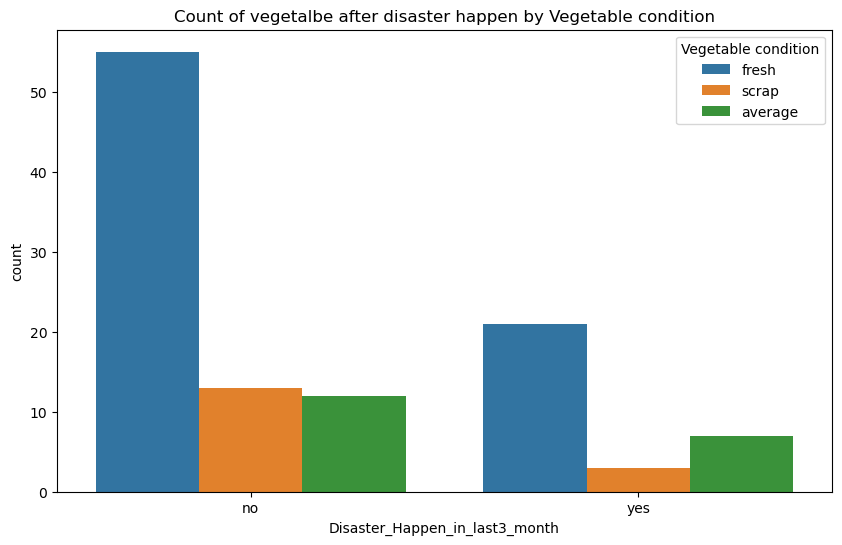

In [147]:
plt.figure(figsize=(10,6))
sns.countplot(data=df , x='Disaster_Happen_in_last3_month',hue='Vegetable condition')
plt.title('Count of vegetalbe after disaster happen by Vegetable condition')

In [149]:
df['Disaster_Happen_in_last3_month'].value_counts()

Disaster_Happen_in_last3_month
no     80
yes    31
Name: count, dtype: int64

In [153]:
# insight, there were more vegetables that had no disaster than those that disaster happended
#so i realised that , the price of vegetables increase when disaster happens

Text(0.5, 1.0, 'Price Distribution Based On Occurence Of Disaster')

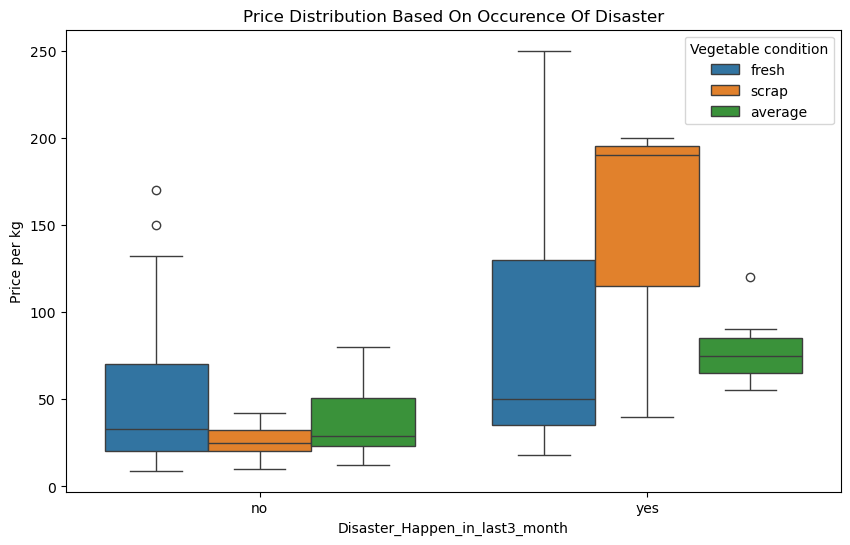

In [157]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Disaster_Happen_in_last3_month',y='Price per kg',hue='Vegetable condition')
plt.title('Price Distribution Based On Occurence Of Disaster')

In [ ]:
#insight, when disaster happen in last 3 months, the most expensive vegetable condition is scrap vegetable, however , it apperas to be the cheapest when there is no disaster. 

Text(0.5, 1.0, 'Disaster happen in last 3 months')

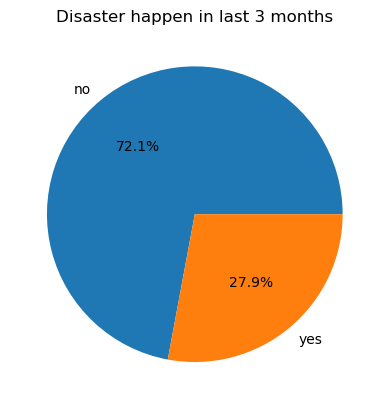

In [161]:
disaster_count= df['Disaster_Happen_in_last3_month'].value_counts()
disaster_df = disaster_count.reset_index(name='count')
plt.pie(disaster_df['count'],labels=df['Disaster_Happen_in_last3_month'].unique(),autopct='%1.1f%%')
plt.title('Disaster happen in last 3 months')

Text(0.5, 1.0, 'Count of vegetable condition based on whether disaster happened')

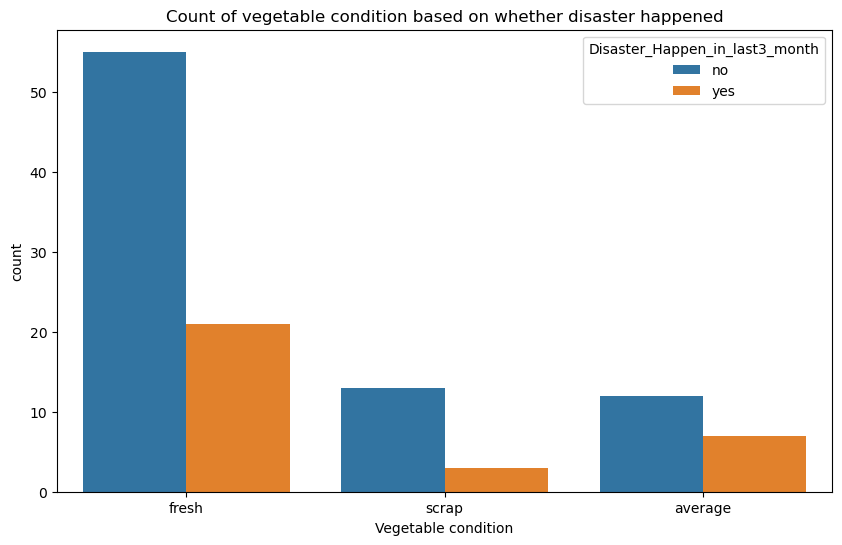

In [225]:
plt.figure(figsize=(10,6))
sns.countplot(x='Vegetable condition',data =df,hue='Disaster_Happen_in_last3_month')
plt.title('Count of vegetable condition based on whether disaster happened')

In [165]:
veg_per_disaster = df.groupby('Vegetable')['Disaster_Happen_in_last3_month'].value_counts()
veg_per_disaster_df=veg_per_disaster.reset_index(name='count')

In [895]:
veg_per_disaster_df

,Vegetable,Disaster_Happen_in_last3_month,count
0,Bittergourd,no,5
1,Brinjal,no,3
2,Brinjal,yes,3
3,Cabbage,yes,5
4,Cabbage,no,2
5,Cauliflower,no,4
6,Cauliflower,yes,2
7,Chilly,no,3
8,Chilly,yes,1
9,Cucumber,no,4


Text(0.5, 1.0, 'Vegetable count by disaster happen in 3 months')

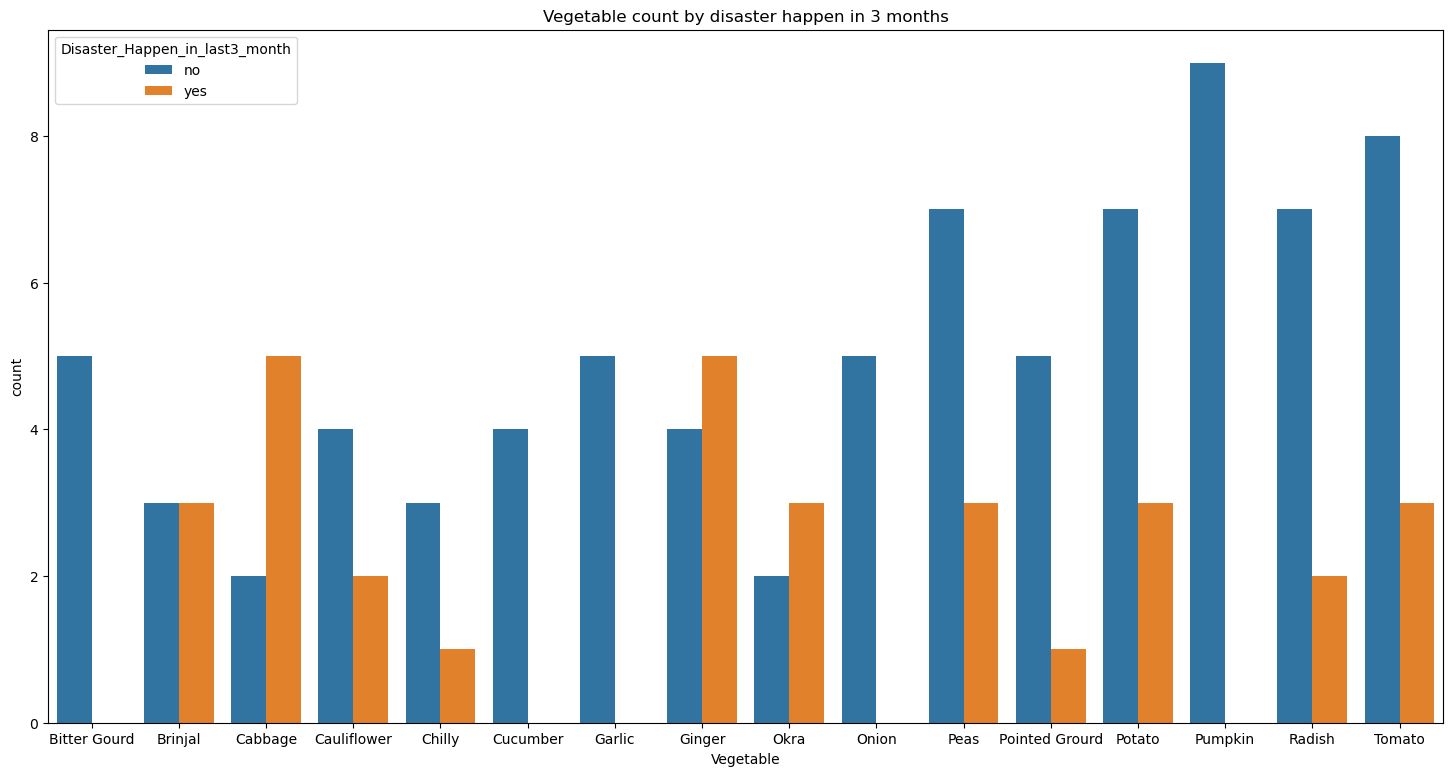

In [167]:
plt.figure(figsize=(18,9))
sns.barplot(x=veg_per_disaster_df['Vegetable'],y=veg_per_disaster_df['count'],hue=veg_per_disaster_df['Disaster_Happen_in_last3_month'])
plt.title('Vegetable count by disaster happen in 3 months')

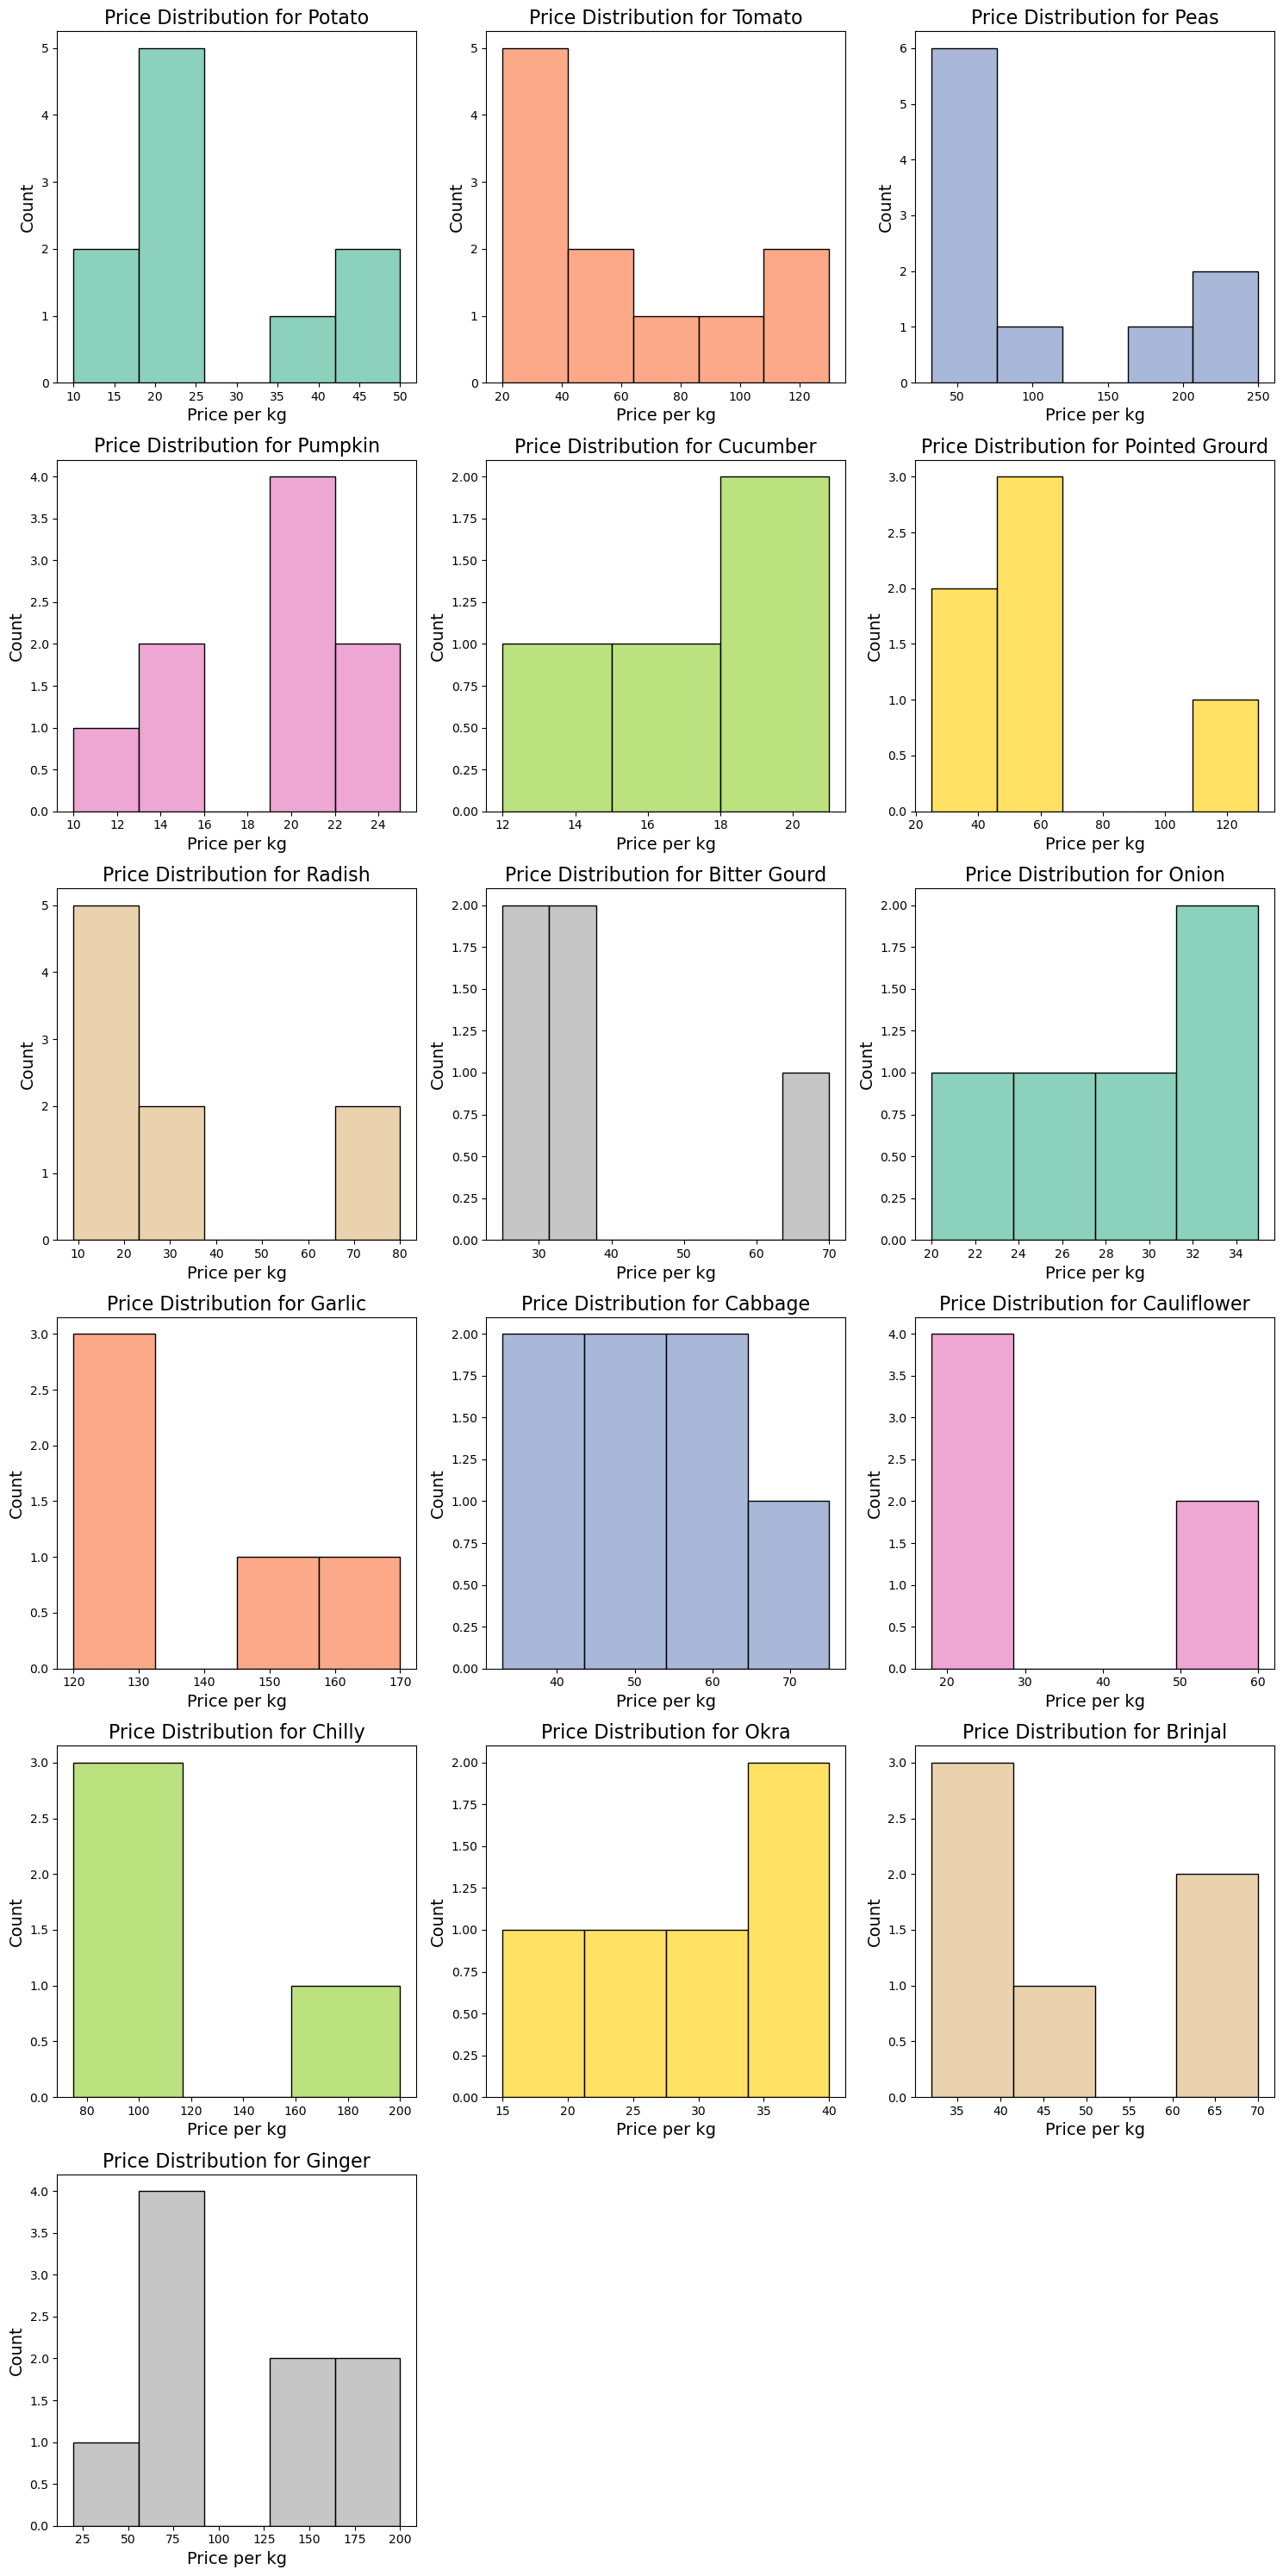

In [169]:

# Function to create histograms for vegetable price distributions
def plot_vegetable_histograms(df, num_cols=3):
    vegetable_conditions = df['Vegetable'].unique()
    num_conditions = len(vegetable_conditions)

    # Calculate number of rows based on the number of unique vegetables
    num_rows = (num_conditions + num_cols - 1) // num_cols

    # Create subplots dynamically
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    # Use Seaborn color palette for variety
    palette = sns.color_palette("Set2", num_conditions)

    # Iterate through vegetables and plot their price histograms
    for ax, vegetable, color in zip(axes, vegetable_conditions, palette):
        condition_data = df[df['Vegetable'] == vegetable]

        if not condition_data.empty:  # Skip empty conditions
            sns.histplot(data=condition_data, x='Price per kg', kde=False, ax=ax, color=color)
            ax.set_title(f'Price Distribution for {vegetable}', fontsize=16)
            ax.set_xlabel('Price per kg', fontsize=14)
            ax.set_ylabel('Count', fontsize=14)

    # Hide any unused subplots
    for ax in axes[num_conditions:]:
        ax.axis('off')

    # Adjust layout for better spacing
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    plt.tight_layout()
    plt.show()


plot_vegetable_histograms(df)


Text(0.5, 1.0, 'Count of each vegetable per season')

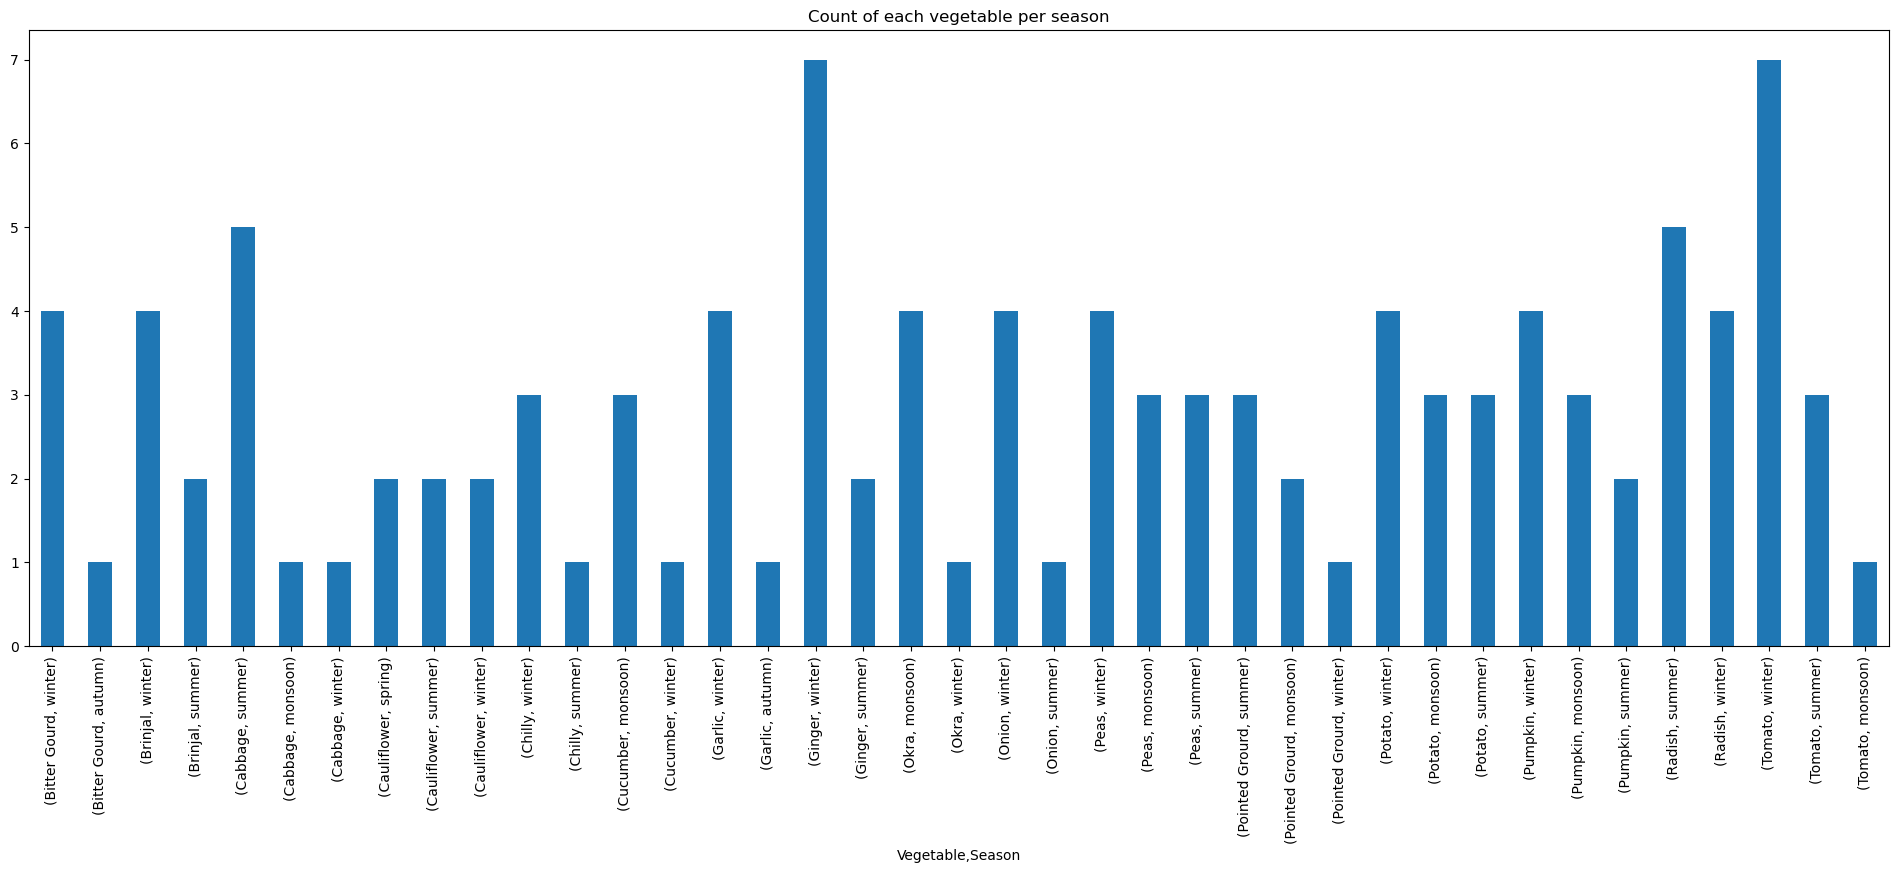

In [203]:
plt.figure(figsize=(24,8))
df.groupby('Vegetable')['Season'].value_counts().plot(kind='bar')
plt.title('Count of each vegetable per season')

In [ ]:
# insight  the number of some vegetable decrease in some seasons and that accounts for the increase in price of vegetables in some seasons